In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/orders_data.csv")
df

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,405-9763961-5211537,"Sun, 18 Jul, 2021, 10:38 pm IST",Mr.,"CHANDIGARH,",CHANDIGARH,SKU: 2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,₹ 449.00,NaN,NaN,Delivered to buyer
1,404-3964908-7850720,"Tue, 19 Oct, 2021, 6:05 pm IST",Minam,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹ 449.00,₹ 60.18,NaN,Delivered to buyer
2,171-8103182-4289117,"Sun, 28 Nov, 2021, 10:20 pm IST",yatipertin,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹ 449.00,₹ 60.18,NaN,Delivered to buyer
3,405-3171677-9557154,"Wed, 28 Jul, 2021, 4:06 am IST",aciya,"DEVARAKONDA,",TELANGANA,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,NaN,NaN,Cash On Delivery,Delivered to buyer
4,402-8910771-1215552,"Tue, 28 Sept, 2021, 2:50 pm IST",Susmita,"MUMBAI,",MAHARASHTRA,SKU: KL-7WAA-Z82I,Pure Leather Sling Bag with Multiple Pockets a...,1,"₹ 1,099.00",₹ 84.96,NaN,Delivered to buyer
...,...,...,...,...,...,...,...,...,...,...,...,...
166,171-2829978-1258758,"Mon, 13 Dec, 2021, 11:30 am IST",Shahin,"MUMBAI,",MAHARASHTRA,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,3,"₹ 1,347.00",₹ 84.96,Cash On Delivery,Delivered to buyer
167,402-3045457-5360311,"Wed, 1 Dec, 2021, 12:18 pm IST",Sharmistha,"DEHRADUN,",UTTARAKHAND,SKU: SB-WDQN-SDN9,Traditional Block-Printed Women's 100% Pure Le...,1,"₹ 1,299.00",₹ 114.46,NaN,Delivered to buyer
168,408-2260162-8323567,"Thu, 9 Dec, 2021, 6:55 pm IST",shashank,"Durg,",CHHATTISGARH,SKU: SB-WDQN-SDN9,Traditional Block-Printed Women's 100% Pure Le...,1,"₹ 1,299.00",₹ 105.02,NaN,Delivered to buyer
169,403-5664951-8941100,"Wed, 23 Feb, 2022, 12:43 am IST",Jayeta,"KOLKATA,",WEST BENGAL,SKU: N8-YFZF-P74I,Stylish and Sleek Multiple Pockets 100 Percent...,1,"₹ 1,499.00",₹ 80.24,Cash On Delivery,Delivered to buyer


In [3]:
df.dtypes

order_no        object
order_date      object
buyer           object
ship_city       object
ship_state      object
sku             object
description     object
quantity         int64
item_total      object
shipping_fee    object
cod             object
order_status    object
dtype: object

### Checking each columns for null values

In [4]:
df.isnull().sum()

order_no          0
order_date        0
buyer             0
ship_city         0
ship_state        0
sku               0
description       0
quantity          0
item_total       18
shipping_fee     26
cod             124
order_status      0
dtype: int64

### Filling each column having null values

In [5]:
# Filling the cod null values as online_payment
df["cod"].fillna("online_payment", inplace=True)

In [6]:
# Filling the item_total null values to "0".
df["item_total"].fillna(0, inplace=True)

In [7]:
# Checking the null value for item_total
df["item_total"].isna().sum()

0

In [8]:
df["cod"]

0        online_payment
1        online_payment
2        online_payment
3      Cash On Delivery
4        online_payment
             ...       
166    Cash On Delivery
167      online_payment
168      online_payment
169    Cash On Delivery
170      online_payment
Name: cod, Length: 171, dtype: object

In [9]:
df["item_total"]

0        ₹ 449.00
1        ₹ 449.00
2        ₹ 449.00
3               0
4      ₹ 1,099.00
          ...    
166    ₹ 1,347.00
167    ₹ 1,299.00
168    ₹ 1,299.00
169    ₹ 1,499.00
170      ₹ 449.00
Name: item_total, Length: 171, dtype: object

In [10]:
df["shipping_fee"]

0           NaN
1       ₹ 60.18
2       ₹ 60.18
3           NaN
4       ₹ 84.96
         ...   
166     ₹ 84.96
167    ₹ 114.46
168    ₹ 105.02
169     ₹ 80.24
170     ₹ 84.96
Name: shipping_fee, Length: 171, dtype: object

In [11]:
df["shipping_fee"].fillna(0, inplace=True)

In [12]:
df

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,405-9763961-5211537,"Sun, 18 Jul, 2021, 10:38 pm IST",Mr.,"CHANDIGARH,",CHANDIGARH,SKU: 2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,₹ 449.00,0,online_payment,Delivered to buyer
1,404-3964908-7850720,"Tue, 19 Oct, 2021, 6:05 pm IST",Minam,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹ 449.00,₹ 60.18,online_payment,Delivered to buyer
2,171-8103182-4289117,"Sun, 28 Nov, 2021, 10:20 pm IST",yatipertin,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹ 449.00,₹ 60.18,online_payment,Delivered to buyer
3,405-3171677-9557154,"Wed, 28 Jul, 2021, 4:06 am IST",aciya,"DEVARAKONDA,",TELANGANA,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,0,0,Cash On Delivery,Delivered to buyer
4,402-8910771-1215552,"Tue, 28 Sept, 2021, 2:50 pm IST",Susmita,"MUMBAI,",MAHARASHTRA,SKU: KL-7WAA-Z82I,Pure Leather Sling Bag with Multiple Pockets a...,1,"₹ 1,099.00",₹ 84.96,online_payment,Delivered to buyer
...,...,...,...,...,...,...,...,...,...,...,...,...
166,171-2829978-1258758,"Mon, 13 Dec, 2021, 11:30 am IST",Shahin,"MUMBAI,",MAHARASHTRA,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,3,"₹ 1,347.00",₹ 84.96,Cash On Delivery,Delivered to buyer
167,402-3045457-5360311,"Wed, 1 Dec, 2021, 12:18 pm IST",Sharmistha,"DEHRADUN,",UTTARAKHAND,SKU: SB-WDQN-SDN9,Traditional Block-Printed Women's 100% Pure Le...,1,"₹ 1,299.00",₹ 114.46,online_payment,Delivered to buyer
168,408-2260162-8323567,"Thu, 9 Dec, 2021, 6:55 pm IST",shashank,"Durg,",CHHATTISGARH,SKU: SB-WDQN-SDN9,Traditional Block-Printed Women's 100% Pure Le...,1,"₹ 1,299.00",₹ 105.02,online_payment,Delivered to buyer
169,403-5664951-8941100,"Wed, 23 Feb, 2022, 12:43 am IST",Jayeta,"KOLKATA,",WEST BENGAL,SKU: N8-YFZF-P74I,Stylish and Sleek Multiple Pockets 100 Percent...,1,"₹ 1,499.00",₹ 80.24,Cash On Delivery,Delivered to buyer


In [13]:
df.describe()

,quantity
count,171.000000
mean,1.087719
std,0.445132
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,4.000000


## Comparing different columns to understand DataFrame better

**comparing quantity vs. item_total**

In [14]:
pd.crosstab(df["quantity"], df["item_total"])

item_total,0,"₹ 1,099.00","₹ 1,299.00","₹ 1,347.00","₹ 1,499.00","₹ 1,796.00",₹ 175.00,₹ 200.00,₹ 250.00,"₹ 3,897.00",₹ 349.00,₹ 399.00,₹ 449.00,₹ 475.00,₹ 499.00,₹ 549.00,₹ 649.00,₹ 898.00,₹ 899.00
quantity,,,,,,,,,,,,,,,,,,,
1,17,7,7,0,2,0,4,1,7,0,8,36,52,5,1,11,5,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


**cod vs. order_status**

In [15]:
pd.crosstab(df["cod"], df["order_status"])

order_status,Delivered to buyer,Returned to seller
cod,,
Cash On Delivery,42,5
online_payment,118,6


In [16]:
# Total count of cod
df["cod"].value_counts()

online_payment      124
Cash On Delivery     47
Name: cod, dtype: int64

In [17]:
df["cod"].value_counts().sum()

171

In [18]:
df["order_status"].value_counts()

Delivered to buyer    160
Returned to seller     11
Name: order_status, dtype: int64

In [19]:
df["order_status"].value_counts().sum()

171

In [20]:
df

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,405-9763961-5211537,"Sun, 18 Jul, 2021, 10:38 pm IST",Mr.,"CHANDIGARH,",CHANDIGARH,SKU: 2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,₹ 449.00,0,online_payment,Delivered to buyer
1,404-3964908-7850720,"Tue, 19 Oct, 2021, 6:05 pm IST",Minam,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹ 449.00,₹ 60.18,online_payment,Delivered to buyer
2,171-8103182-4289117,"Sun, 28 Nov, 2021, 10:20 pm IST",yatipertin,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹ 449.00,₹ 60.18,online_payment,Delivered to buyer
3,405-3171677-9557154,"Wed, 28 Jul, 2021, 4:06 am IST",aciya,"DEVARAKONDA,",TELANGANA,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,0,0,Cash On Delivery,Delivered to buyer
4,402-8910771-1215552,"Tue, 28 Sept, 2021, 2:50 pm IST",Susmita,"MUMBAI,",MAHARASHTRA,SKU: KL-7WAA-Z82I,Pure Leather Sling Bag with Multiple Pockets a...,1,"₹ 1,099.00",₹ 84.96,online_payment,Delivered to buyer
...,...,...,...,...,...,...,...,...,...,...,...,...
166,171-2829978-1258758,"Mon, 13 Dec, 2021, 11:30 am IST",Shahin,"MUMBAI,",MAHARASHTRA,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,3,"₹ 1,347.00",₹ 84.96,Cash On Delivery,Delivered to buyer
167,402-3045457-5360311,"Wed, 1 Dec, 2021, 12:18 pm IST",Sharmistha,"DEHRADUN,",UTTARAKHAND,SKU: SB-WDQN-SDN9,Traditional Block-Printed Women's 100% Pure Le...,1,"₹ 1,299.00",₹ 114.46,online_payment,Delivered to buyer
168,408-2260162-8323567,"Thu, 9 Dec, 2021, 6:55 pm IST",shashank,"Durg,",CHHATTISGARH,SKU: SB-WDQN-SDN9,Traditional Block-Printed Women's 100% Pure Le...,1,"₹ 1,299.00",₹ 105.02,online_payment,Delivered to buyer
169,403-5664951-8941100,"Wed, 23 Feb, 2022, 12:43 am IST",Jayeta,"KOLKATA,",WEST BENGAL,SKU: N8-YFZF-P74I,Stylish and Sleek Multiple Pockets 100 Percent...,1,"₹ 1,499.00",₹ 80.24,Cash On Delivery,Delivered to buyer


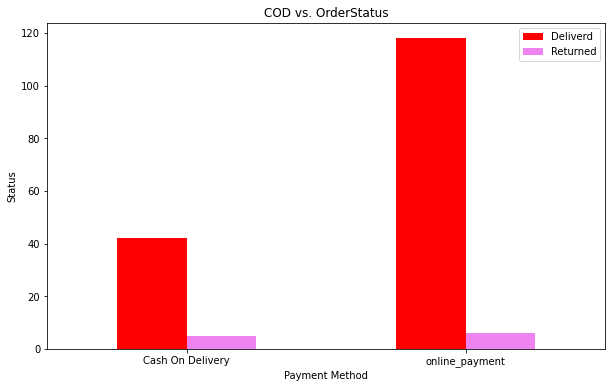

In [21]:
# Plotting the graph for cod vs. order_status
pd.crosstab(df["cod"], df["order_status"]).plot(kind="bar", figsize=(10,6),
                                                color=["red", "violet"]);

plt.title("COD vs. OrderStatus")
plt.xlabel("Payment Method")
plt.ylabel("Status")
plt.legend(["Deliverd", "Returned"])
plt.xticks(rotation=0); #To change the position of 0 & 1 in x-axis

As we can see from the above bar graph that maximum product ordered was from online payment and it was delivered
to the customer. And more return of products are from COD.

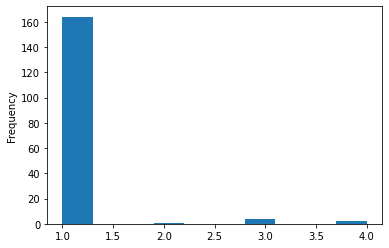

In [22]:
df["quantity"].plot.hist();

The above graph shows the maximum number of the products which were delivered is 1

**quantity vs. order_status**

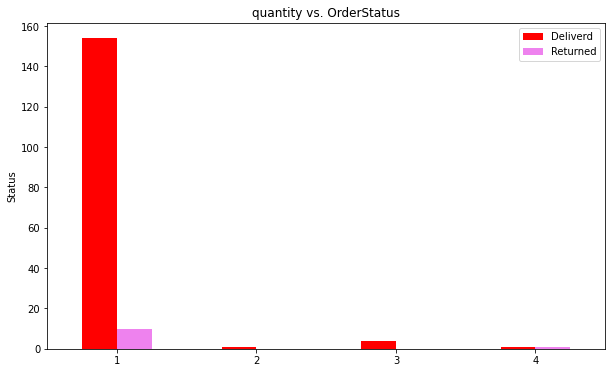

In [23]:
# Plotting the graph for cod vs. order_status
pd.crosstab(df["quantity"], df["order_status"]).plot(kind="bar", figsize=(10,6),
                                                color=["red", "violet"]);

plt.title("quantity vs. OrderStatus")
plt.xlabel("")
plt.ylabel("Status")
plt.legend(["Deliverd", "Returned"])
plt.xticks(rotation=0);

The maximum number of products which were returned to seller is 4.

In [24]:
# Converting the place(city) to upper case
place = ['ship_city']
for i in place:
    df[i] = df[i].apply(lambda x: x.upper())

In [25]:
df["ship_city"]

0       CHANDIGARH,
1         PASIGHAT,
2         PASIGHAT,
3      DEVARAKONDA,
4           MUMBAI,
           ...     
166         MUMBAI,
167       DEHRADUN,
168           DURG,
169        KOLKATA,
170         MUMBAI,
Name: ship_city, Length: 171, dtype: object

In [26]:
# Combining ship_city and ship_state into one column as ship_place
df["ship_place"] = df["ship_city"] + " " + df["ship_state"]

In [27]:
df["ship_place"]

0           CHANDIGARH, CHANDIGARH
1      PASIGHAT, ARUNACHAL PRADESH
2      PASIGHAT, ARUNACHAL PRADESH
3           DEVARAKONDA, TELANGANA
4              MUMBAI, MAHARASHTRA
                  ...             
166            MUMBAI, MAHARASHTRA
167          DEHRADUN, UTTARAKHAND
168             DURG, CHHATTISGARH
169           KOLKATA, WEST BENGAL
170            MUMBAI, MAHARASHTRA
Name: ship_place, Length: 171, dtype: object

In [28]:
df

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status,ship_place
0,405-9763961-5211537,"Sun, 18 Jul, 2021, 10:38 pm IST",Mr.,"CHANDIGARH,",CHANDIGARH,SKU: 2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,₹ 449.00,0,online_payment,Delivered to buyer,"CHANDIGARH, CHANDIGARH"
1,404-3964908-7850720,"Tue, 19 Oct, 2021, 6:05 pm IST",Minam,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹ 449.00,₹ 60.18,online_payment,Delivered to buyer,"PASIGHAT, ARUNACHAL PRADESH"
2,171-8103182-4289117,"Sun, 28 Nov, 2021, 10:20 pm IST",yatipertin,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹ 449.00,₹ 60.18,online_payment,Delivered to buyer,"PASIGHAT, ARUNACHAL PRADESH"
3,405-3171677-9557154,"Wed, 28 Jul, 2021, 4:06 am IST",aciya,"DEVARAKONDA,",TELANGANA,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,0,0,Cash On Delivery,Delivered to buyer,"DEVARAKONDA, TELANGANA"
4,402-8910771-1215552,"Tue, 28 Sept, 2021, 2:50 pm IST",Susmita,"MUMBAI,",MAHARASHTRA,SKU: KL-7WAA-Z82I,Pure Leather Sling Bag with Multiple Pockets a...,1,"₹ 1,099.00",₹ 84.96,online_payment,Delivered to buyer,"MUMBAI, MAHARASHTRA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,171-2829978-1258758,"Mon, 13 Dec, 2021, 11:30 am IST",Shahin,"MUMBAI,",MAHARASHTRA,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,3,"₹ 1,347.00",₹ 84.96,Cash On Delivery,Delivered to buyer,"MUMBAI, MAHARASHTRA"
167,402-3045457-5360311,"Wed, 1 Dec, 2021, 12:18 pm IST",Sharmistha,"DEHRADUN,",UTTARAKHAND,SKU: SB-WDQN-SDN9,Traditional Block-Printed Women's 100% Pure Le...,1,"₹ 1,299.00",₹ 114.46,online_payment,Delivered to buyer,"DEHRADUN, UTTARAKHAND"
168,408-2260162-8323567,"Thu, 9 Dec, 2021, 6:55 pm IST",shashank,"DURG,",CHHATTISGARH,SKU: SB-WDQN-SDN9,Traditional Block-Printed Women's 100% Pure Le...,1,"₹ 1,299.00",₹ 105.02,online_payment,Delivered to buyer,"DURG, CHHATTISGARH"
169,403-5664951-8941100,"Wed, 23 Feb, 2022, 12:43 am IST",Jayeta,"KOLKATA,",WEST BENGAL,SKU: N8-YFZF-P74I,Stylish and Sleek Multiple Pockets 100 Percent...,1,"₹ 1,499.00",₹ 80.24,Cash On Delivery,Delivered to buyer,"KOLKATA, WEST BENGAL"


In [29]:
# Removing the ship_city and ship_state column
del df["ship_city"]

In [30]:
del df["ship_state"]

**ship_place vs cod**

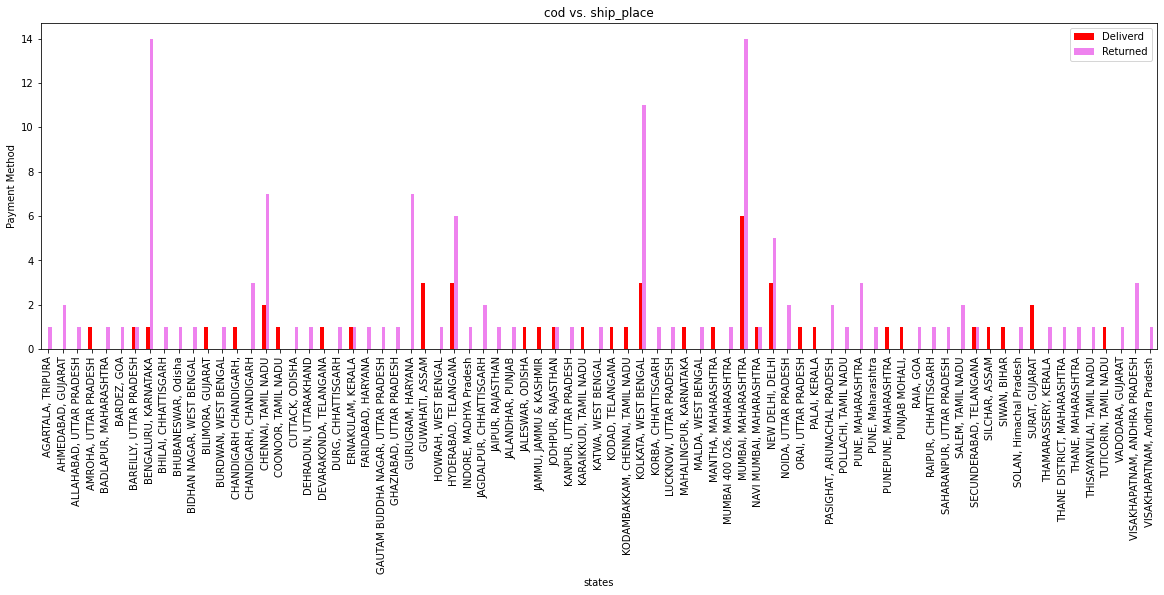

In [31]:
# Plotting the graph for cod vs. ship_place.
# The states(city) are arranged in ascending order.
pd.crosstab(df["ship_place"], df["cod"]).plot(kind="bar", figsize=(20,6),
                                                color=["red", "violet"]);


plt.title("cod vs. ship_place")
plt.xlabel("states")
plt.ylabel("Payment Method")
plt.legend(["Deliverd", "Returned"]);